In [1]:
import numpy as np
from numpy.random import default_rng as rng
rand = rng().uniform
from tabulate import tabulate
import matplotlib.pyplot as plt
import lmfit as lf

asin = np.arcsin
pi = np.pi
mean = np.mean #sum/number
var = np.var #sum(entry - mean)^2/number

# Q1a,b

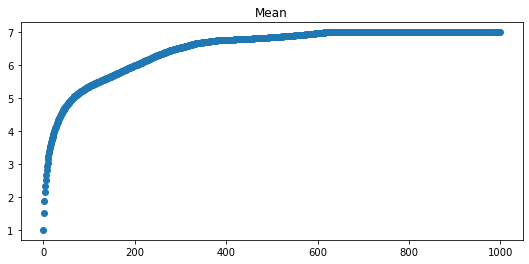

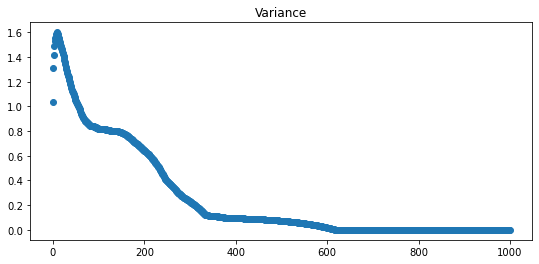

In [2]:
num = int(1e+03)
results = rng().exponential(1,num)
ez = []; vz = []
for i in range(num):
    j = 0; emean = 0
    for j in range(num-i):
        try: #skip entries at the ends that don't go out to j+i
            emean += max(results[j:j+i+1])
        except ValueError: pass
    emean = emean/(num-i)
    j = 0; evar = 0
    for j in range(num-i):
        try:
            evar += (max(results[j:j+i+1]) - emean)**2
        except ValueError: pass
    ez.append(emean)
    vz.append(evar/(num-i))

plt.figure(figsize=(9,4))
plt.title("Mean")
plt.scatter(range(num),ez,label="mean")
plt.show()
plt.figure(figsize=(9,4))
plt.title("Variance")
plt.scatter(range(num),vz,label="variance")
plt.show()

For fitting, we will ignore the data past $n=750$ &mdash; the last quarter &mdash; as we have worse statistics the higher $n$ goes.

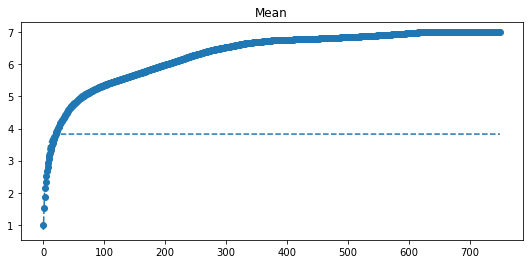

In [3]:
def f_mean(x,m,r):
    return m*(1-np.exp(-r*x))
def f_var(x,A,a,b):
    return A*np.exp(-(x-a)**2/b)

mean_mod = lf.Model(f_mean)
var_mod = lf.Model(f_var)
mean_params = mean_mod.make_params(m=6,r=1)
mean_mod.set_param_hint('r',min=0)
var_params = var_mod.make_params(A=1.3,a=25,b=1)
var_mod.set_param_hint('b',min=0)

mean_fit = mean_mod.fit(ez[:750],mean_params,x=[x for x in range(1,751)],weights=[1/i for i in range(1,751)])
var_fit = var_mod.fit(vz[:750],var_params,x=[x for x in range(1,751)],weights=[1/i for i in range(1,751)])

plt.figure(figsize=(9,4))
plt.title("Mean")
plt.scatter(range(750),ez[:750])
plt.plot(range(750),mean_fit.best_fit,'--')
plt.show()

mean_fit

NameError: name 'ev' is not defined

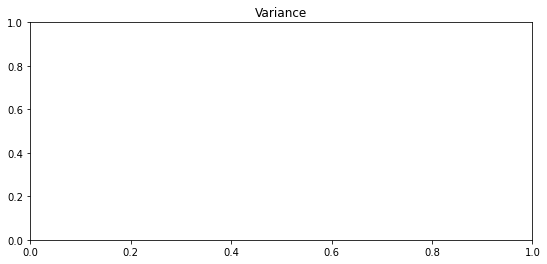

In [4]:
plt.figure(figsize=(9,4))
plt.title("Variance")
plt.scatter(range(750),vz[:750])
plt.plot(range(750),var_fit.best_fit,'--')
plt.show()

var_fit